# 8.1. Redes Neurais Convolucionais Profundas (AlexNet)

Embora a ideia de redes neurais profundas seja bem simples (empilhar várias camadas), o desempenho pode variar muito entre arquiteturas e escolhas de hiperparâmetros.

__As redes neurais descritas neste capítulo são o produto da intuição, alguns insights matemáticos e muita tentativa e erro.__

- AlexNet  (Krizhevsky et al., 2012): primeira rede em larga escala;

- ResNet (He et al., 2016): a rede residual (ResNet), que continua sendo uma das arquiteturas prontas mais populares em visão computacional. 



Embora as CNNs fossem bem conhecidas nas comunidades de visão computacional e aprendizado de máquina após a introdução do LeNet (LeCun et al. , 1995) , elas não dominaram o campo imediatamente.

Na verdade, durante grande parte do período entre o início da década de 1990 e os resultados decisivos de 2012 ( Krizhevsky et al. , 2012 ) , as redes neurais foram frequentemente superadas por outros métodos de aprendizado de máquina, como métodos de kernel ( Schölkopf e Smola, 2002 ) , métodos de conjunto ( Freund e Schapire, 1996 ) e estimativa estruturada ( Tascar et al. , 2004 ) .

# 8.1.1. Aprendizagem de representação

Curiosamente, nas camadas mais baixas da rede, o modelo aprendeu extratores de recursos que se assemelhavam a alguns filtros tradicionais. A Fig. 8.1.1 mostra descritores de imagem de nível inferior. Camadas mais altas na rede podem se basear nessas representações para representar estruturas maiores, como olhos, narizes, folhas de grama e assim por diante. Camadas ainda mais altas podem representar objetos inteiros, como pessoas, aviões, cães ou frisbees. Por fim, o estado oculto final aprende uma representação compacta da imagem que resume seu conteúdo de forma que dados pertencentes a diferentes categorias possam ser facilmente separados.

__AlexNet (2012) e seu precursor LeNet (1995) compartilham muitos elementos arquitetônicos. Isso levanta a questão: por que demorou tanto? Uma diferença fundamental foi que, nas duas décadas anteriores, a quantidade de dados e o poder de computação disponível aumentaram significativamente. Como tal, AlexNet era muito maior: foi treinado em muito mais dados e em GPUs muito mais rápidas em comparação com as CPUs disponíveis em 1995.__

# 8.1.1.1. Ingrediente Faltante: Dados

Modelos profundos com muitas camadas requerem grandes quantidades de dados para entrar no regime onde eles superam significativamente os métodos tradicionais baseados em otimizações convexas (por exemplo, métodos lineares e kernel). No entanto, dada a capacidade limitada de armazenamento dos computadores, a despesa relativa de sensores (de imagem) e os orçamentos de pesquisa comparativamente mais apertados na década de 1990, a maioria das pesquisas dependia de pequenos conjuntos de dados.

- Em 2009, o conjunto de dados ImageNet foi lançado ( Deng et al. , 2009 ) , desafiando pesquisadores a aprender modelos de 1 milhão de exemplos, 1000 de cada 1000 categorias distintas de objetos.

- Os maiores conjuntos de dados de visão, como LAION-5B ( Schuhmann et al. , 2022 ) contêm bilhões de imagens com metadados adicionais.



# 8.1.1.2. Ingrediente Faltante: Hardware

__What are FLoating-Point Operations per Second (FLOPS)? FLOPS is a unit of measurement used to quantify the computing power of a computer or a processor.__

Modelos de aprendizado profundo são consumidores vorazes de ciclos de computação. O treinamento pode levar centenas de épocas, e cada iteração requer a passagem de dados por muitas camadas de operações de álgebra linear computacionalmente caras. Esta é uma das principais razões pelas quais, na década de 1990 e no início dos anos 2000, algoritmos simples baseados em objetivos convexos otimizados de forma mais eficiente eram preferidos.

Unidades de processamento gráfico (GPUs) provaram ser um divisor de águas ao tornar o aprendizado profundo viável. Esses chips foram desenvolvidos anteriormente para acelerar o processamento gráfico para beneficiar jogos de computador. 

As CPUs são comparativamente ruins em qualquer tarefa única quando comparadas com hardware dedicado. Os laptops modernos têm de 4 a 8 núcleos, e mesmo servidores de ponta raramente excedem 64 núcleos por soquete, simplesmente porque não é econômico.

Em comparação, as GPUs podem consistir em milhares de pequenos elementos de processamento (os chips Ampere mais recentes da NVIDIA têm até 6912 núcleos CUDA), frequentemente agrupados em grupos maiores (a NVIDIA os chama de warps). Os detalhes diferem um pouco entre NVIDIA, AMD, ARM e outros fornecedores de chips. Embora cada núcleo seja relativamente fraco, rodando a uma frequência de clock de cerca de 1 GHz, é o número total desses núcleos que torna as GPUs ordens de magnitude mais rápidas do que as CPUs.

Por exemplo, a recente GPU Ampere A100 da NVIDIA oferece mais de 300 TFLOPs por chip para multiplicações de matriz-matriz de precisão de 16 bits especializadas (BFLOAT16) e até 20 TFLOPs para operações de ponto flutuante de uso geral (FP32). Ao mesmo tempo, o desempenho de ponto flutuante das CPUs raramente excede 1 TFLOPs.

Há muitas razões pelas quais as GPUs são muito mais rápidas do que as CPUs em termos de FLOPs. Primeiro, o consumo de energia tende a crescer quadraticamente com a frequência do clock. Novamente, as GPUs brilham aqui com barramentos que são pelo menos 10 vezes mais largos que muitas CPUs.

Voltando para 2012. Um grande avanço ocorreu quando Alex Krizhevsky e Ilya Sutskever implementaram uma CNN profunda que podia rodar em GPUs. Eles perceberam que os gargalos computacionais em CNNs, convoluções e multiplicações de matrizes, são todas operações que poderiam ser paralelizadas em hardware. Usando duas NVIDIA GTX 580s com 3 GB de memória, qualquer uma das quais era capaz de 1,5 TFLOPs (ainda um desafio para a maioria das CPUs uma década depois), eles implementaram convoluções rápidas. O código cuda-convnet era bom o suficiente para que por vários anos fosse o padrão da indústria e impulsionasse os primeiros anos do boom do aprendizado profundo.

# 8.1.2. AlexNet

AlexNet, que empregou uma CNN de 8 camadas, venceu o ImageNet Large Scale Visual Recognition Challenge 2012 por uma grande margem ( Russakovsky et al. , 2013 ) 

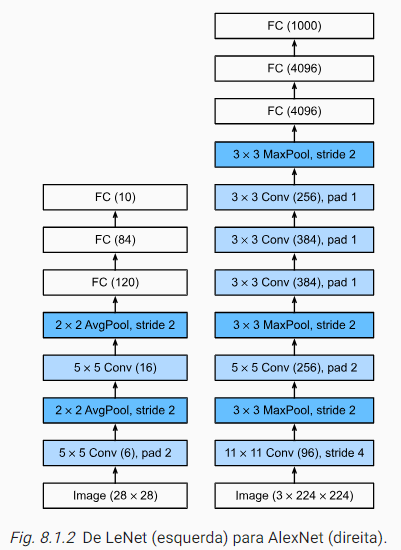

Também há diferenças significativas entre AlexNet e LeNet. Primeiro, AlexNet é muito mais profundo do que o comparativamente pequeno LeNet-5. AlexNet consiste em oito camadas: cinco camadas convolucionais, duas camadas ocultas totalmente conectadas e uma camada de saída totalmente conectada. Segundo, AlexNet usou o ReLU em vez do sigmoide como sua função de ativação. 


# 8.1.2.1. Arquitetura



Na primeira camada do AlexNet, a forma da janela de convolução é 11x11. Como as imagens no ImageNet são oito vezes (224/28=8) mais altas e largas do que as imagens MNIST, os objetos nos dados do ImageNet tendem a ocupar mais pixels com mais detalhes visuais. Consequentemente, uma janela de convolução maior é necessária para capturar o objeto. O formato da janela de convolução na segunda camada é reduzido para 5x5, seguido pela 3x3. Além disso, após a primeira, segunda e quinta camadas convolucionais, a rede adiciona camadas de pooling máximo com um formato de janela de 3x3 e um passo de 2. Além disso, o AlexNet tem dez vezes mais canais de convolução que o LeNet.

Após a camada convolucional final, há duas enormes camadas totalmente conectadas com 4096 saídas. Essas camadas exigem parâmetros de modelo de quase 1 GB. Devido à memória limitada nas primeiras GPUs, o AlexNet original usou um design de fluxo de dados duplo (paralelo). Felizmente, a memória da GPU é comparativamente abundante agora, então raramente precisamos dividir modelos entre GPUs atualmente (nossa versão do modelo AlexNet se desvia do artigo original neste aspecto).



# 8.1.2.2. Funções de ativação

Além disso, o AlexNet alterou a função de ativação sigmoide para uma função de ativação ReLU mais simples. Por um lado, o cálculo da função de ativação ReLU é mais simples. Por exemplo, ele não tem a operação de exponenciação encontrada na função de ativação sigmoide. Por outro lado, a função de ativação ReLU torna o treinamento do modelo mais fácil ao usar diferentes métodos de inicialização de parâmetros. 

# 8.1.2.3. Controle de Capacidade e Pré-processamento

O AlexNet controla a complexidade do modelo da camada totalmente conectada por dropout ( Seção 5.6 ), enquanto o LeNet usa apenas decaimento de peso. Para aumentar ainda mais os dados, o loop de treinamento do AlexNet adicionou uma grande quantidade de aumento de imagem, como inversão, recorte e mudanças de cor. Isso torna o modelo mais robusto e o tamanho maior da amostra reduz efetivamente o overfitting


In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),nn.ReLU(),  # camada convolucional 1
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),           # camada convolucional 2
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),           # camada convolucional 3
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),           # camada convolucional 4
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),           # camada convolucional 5
            nn.MaxPool2d(kernel_size=3, stride=2), 
            nn.Flatten(), # achatamento para inicio das camadas totalmente conectadas
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),                 # camada totalmente conectada 1
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),                  # camada totalmente conectada 2
            nn.LazyLinear(num_classes))                                        # camada de saída. Total = 8 camadas
        self.net.apply(d2l.init_cnn) # aplica a inicialização Xavier                                    

Construímos um exemplo de dados de canal único com altura e largura de 224 para observar o formato de saída de cada camada. Ele corresponde à arquitetura AlexNet na Fig. 8.1.2 .

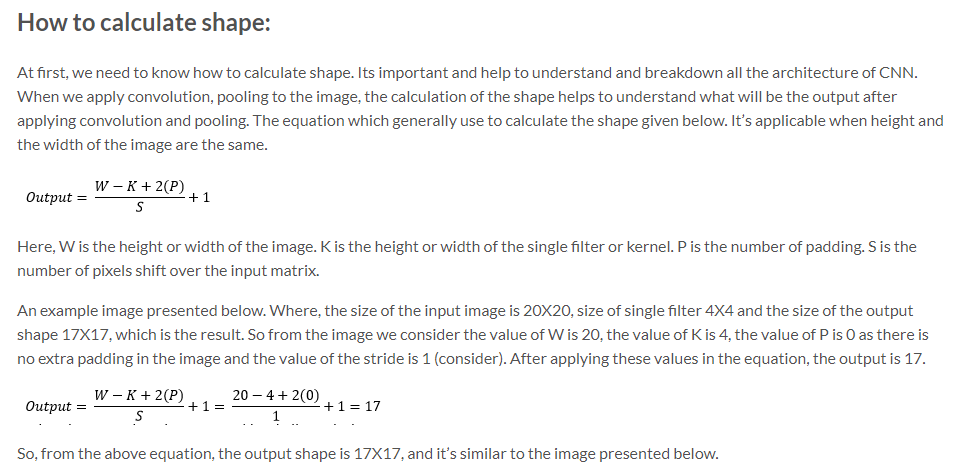

https://arnabfly.github.io/arnab_blog/alexnet/

In [4]:
AlexNet().layer_summary((1, 1, 224, 224))              # Sumário para entrada de shape (1, 1, 224, 224)

C:\Users\zeh\pythonProject\.venv\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

Imagem de entrada: 3x224x224
OUTPUT = (W-K+2*P)//S + 1

Conv2d output shape:	 torch.Size([1, 96, 54, 54]) \
nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1)
OUTPUT: (224-11+2*1)//4 + 1 = 54 

MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
nn.MaxPool2d(kernel_size=3, stride=2)
OUTPUT: 54/3 = 18  (De acordo com d2l)
OUTPUT: (54-3+2*0)//2 + 1 = 26

nn.LazyConv2d(256, kernel_size=5, padding=2)

# 8.1.3. Treinamento

Embora o AlexNet tenha sido treinado no ImageNet em Krizhevsky et al. ( 2012 ), usamos o Fashion-MNIST aqui, pois treinar um modelo do ImageNet para convergência pode levar horas ou dias, mesmo em uma GPU moderna. Um dos problemas com a aplicação direta do AlexNet no Fashion-MNIST é que suas imagens têm resolução mais baixa (28x28 pixels) do que as imagens do ImageNet. Para fazer as coisas funcionarem, nós as ampliamos para 224x224. Isso geralmente não é uma prática inteligente, pois simplesmente aumenta a complexidade computacional sem adicionar informações. No entanto, fazemos isso aqui para sermos fiéis à arquitetura AlexNet. Realizamos esse redimensionamento com o resize argumento no d2l.FashionMNISTconstrutor.

Agora, podemos começar a treinar o AlexNet. Comparado ao LeNet na Seção 7.6 , a principal mudança aqui é o uso de uma taxa de aprendizado menor e um treinamento muito mais lento devido à rede mais profunda e ampla, à resolução de imagem mais alta e às convoluções mais custosas.

In [5]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224)) # Resize de 28x28 para 224x224, para adquar a imagem a rede
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

In [18]:
# SAVE PARAMS:
torch.save(model.state_dict(), 'AlexNet.params')   # salva todos os parâmetros do modelo.
 #  EXTENSÃO PARA PARÂMETROS: .params


In [6]:
[(name, param.shape) for name, param in model.named_parameters()]

RuntimeError: Can't access the shape of an uninitialized parameter or buffer. This error usually happens in `load_state_dict` when trying to load an uninitialized parameter into an initialized one. Call `forward` to initialize the parameters before accessing their attributes.

In [19]:
# LOAD PARAMS:
# Recuperar/carregar os parâmetros salvos.
clone = AlexNet()                                    # instanciamos um clone do modelo MLP original
clone.load_state_dict(torch.load('AlexNet.params'))  # lemos os parâmetros armazenados no arquivo diretamente.
clone.eval()
 #  EXTENSÃO PARA PARÂMETROS: .params

AlexNet(
  (net): Sequential(
    (0): LazyConv2d(0, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): LazyConv2d(0, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): LazyConv2d(0, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): LazyConv2d(0, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): LazyLinear(in_features=0, out_features=4096, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.5, inplace=False)
    (17): LazyLinear(in_features=0, out_features=4096, bias=True)
    (18

In [7]:
# SUMÁRIO DETALHADO: size(1,1,224, 224)
# ------------------------------------
from torchsummary import summary

def stat_params(net, params):
    for idx, module in enumerate(net):
        if type(module) not in (nn.Linear,nn.Conv2d):
            continue
        num = sum(p.numel() for p in module.parameters())
        if type(module) == nn.Conv2d:
            params['conv'] += num
        else:
            params['lr'] += num


model = AlexNet(lr=0.01)

X = torch.randn(1,1,224, 224)
# X = torch.randn(1,3,224, 224)
_ = model(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    if type(module) == nn.Sequential:
        stat_params(module,params)
    if type(module) == nn.Linear:
        num = sum(p.numel() for p in module.parameters())
        params['lr'] += num

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

summary(model, (1, 224, 224))
# summary(model, (3, 224, 224))
params


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 54, 54]          11,712
              ReLU-2           [-1, 96, 54, 54]               0
         MaxPool2d-3           [-1, 96, 26, 26]               0
            Conv2d-4          [-1, 256, 26, 26]         614,656
              ReLU-5          [-1, 256, 26, 26]               0
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 384, 12, 12]         885,120
              ReLU-8          [-1, 384, 12, 12]               0
            Conv2d-9          [-1, 384, 12, 12]       1,327,488
             ReLU-10          [-1, 384, 12, 12]               0
           Conv2d-11          [-1, 256, 12, 12]         884,992
             ReLU-12          [-1, 256, 12, 12]               0
        MaxPool2d-13            [-1, 256, 5, 5]               0
          Flatten-14                 [-

{'conv': 0, 'lr': 43040778}

In [21]:
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')                                       # transfere os dados da cpu para a gpu.
y = y.to('cuda')                                       # transfere os dados da cpu para a gpu.
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

acc: 0.83


In [23]:
import matplotlib.pyplot as plt

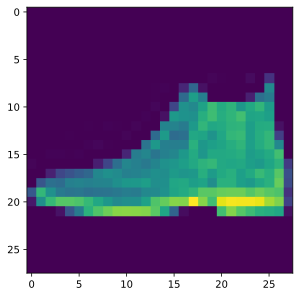

In [35]:
# Pega a primeira linha de data.val.data
# Converte para torch.float32
# unsqueeze insere a dimensão unitária em local específico (posição 1).
pic = data.val.data[0,:].type(torch.float32).unsqueeze(dim=0)
img = pic.squeeze().cpu()                                         # squeeze retira a dimensão unitária do tensor
plt.imshow(img)  
# d2l.show_images(img, num_rows=1, num_cols=1)   # Serve apenas para plotar uma lista de imagens.

In [36]:
pic.shape

torch.Size([1, 28, 28])

In [30]:
from torchvision.transforms import v2

In [37]:
# resized_imgs = [v2.Resize(size=size)(original_image) for size in (30, 50, 100, original_image.size)]
pic = v2.Resize(size=(224, 224))(pic)    # fornecendo apenas um valor para o size a dimensão é mantida.
pic.shape

torch.Size([1, 224, 224])

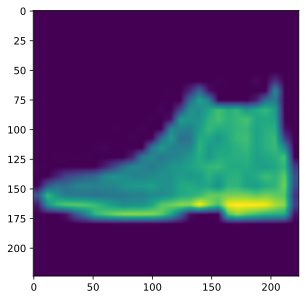

In [38]:
img = pic.squeeze().cpu()                                         # squeeze retira a dimensão unitária do tensor
plt.imshow(img)  

torch.Size([96, 54, 54])

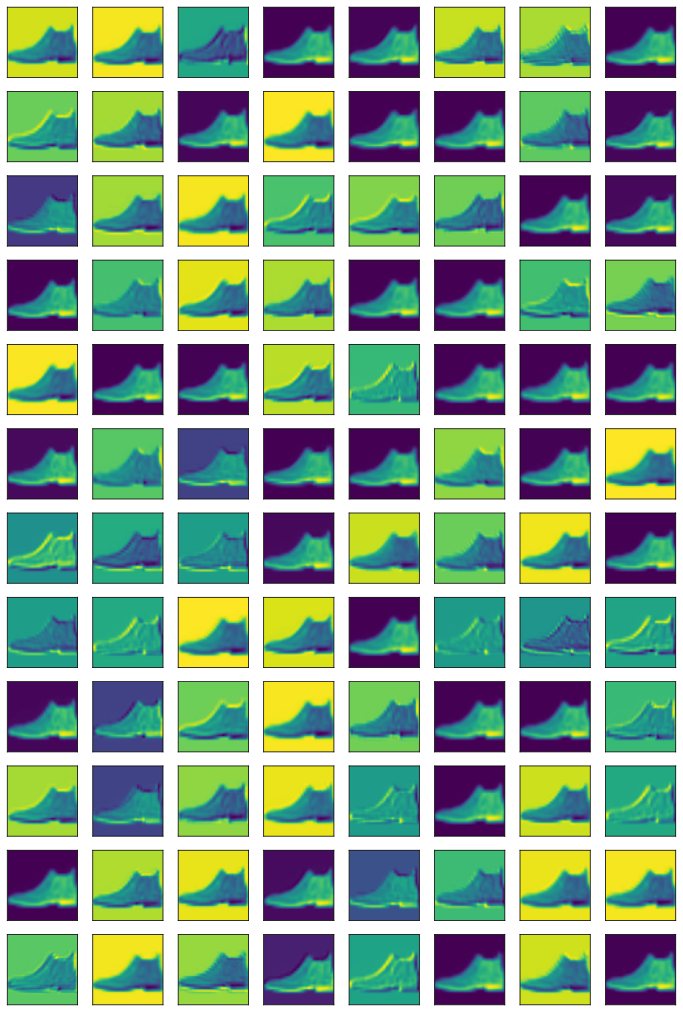

In [43]:
# Convoluções da Primeira camada
saida = model.net[0](pic.cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
d2l.show_images(saida.cpu().reshape(96,54,54),12,8)   # 2 imagens de 16@10x10
saida.shape   # Shape de Saída.

In [44]:
# Doze primeiras camadas = todas as camadas
# saida = model.net[:12](pic.unsqueeze(dim=0).cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
saida = model.net(pic.unsqueeze(dim=0).cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
saida.shape   # Shape de Saída.

torch.Size([1, 10])

In [45]:
saida

tensor([[ -908.8054, -1121.4506, -1035.9279,  -593.5947,  -851.6495,  1129.5087,
          -887.4806,  1994.0028,    36.6302,  2356.3689]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [46]:
# ------------------------------------------------------------------------------------
# CLASSIFICA A IMAGEM CONFORME A SAÍDA.
m = saida.max()                                        # saída máxima
idx_tensor = (saida==m).nonzero(as_tuple=True)[1]      # índice do tensor
indice = int(idx_tensor)                               # converte tensor para inteiro

list_chaves = []                                       # cria lista vazia
classificadores = data.val.class_to_idx                # dicionário de classificação do FashionMNIST
chaves = classificadores.keys()                        # Chaves do dicionário
for chave in chaves:    
    list_chaves.append(chave)                          # Coloca as chaves em uma lista
classificacao = list_chaves[indice]                    # Busca o indice na lista
classificacao
# ------------------------------------------------------------------------------------

'Ankle boot'

# Código Agrupado

# Treinamento

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt            # para plot
from torchvision.transforms import v2      # para resize
# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)


AlexNet().layer_summary((1, 1, 224, 224))


model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224)) # Resize de 28x28 para 224x224, para adquar a imagem a rede
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

# -----------------------------------------------------------------------------------------------------
# SALVA PARÂMETROS TREINADOS
torch.save(model.state_dict(), 'AlexNet.params')                    # salva todos os parâmetros do modelo treinado.
 #  EXTENSÃO PARA PARÂMETROS: .params

[(name, param.shape) for name, param in model.named_parameters()]   # nomes dos parâmetros

# Validação com uma imagem de data.val

acc: 0.83


'Coat'

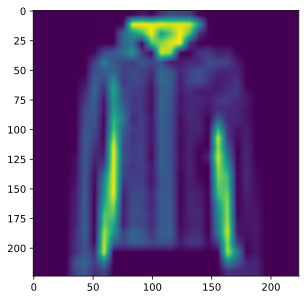

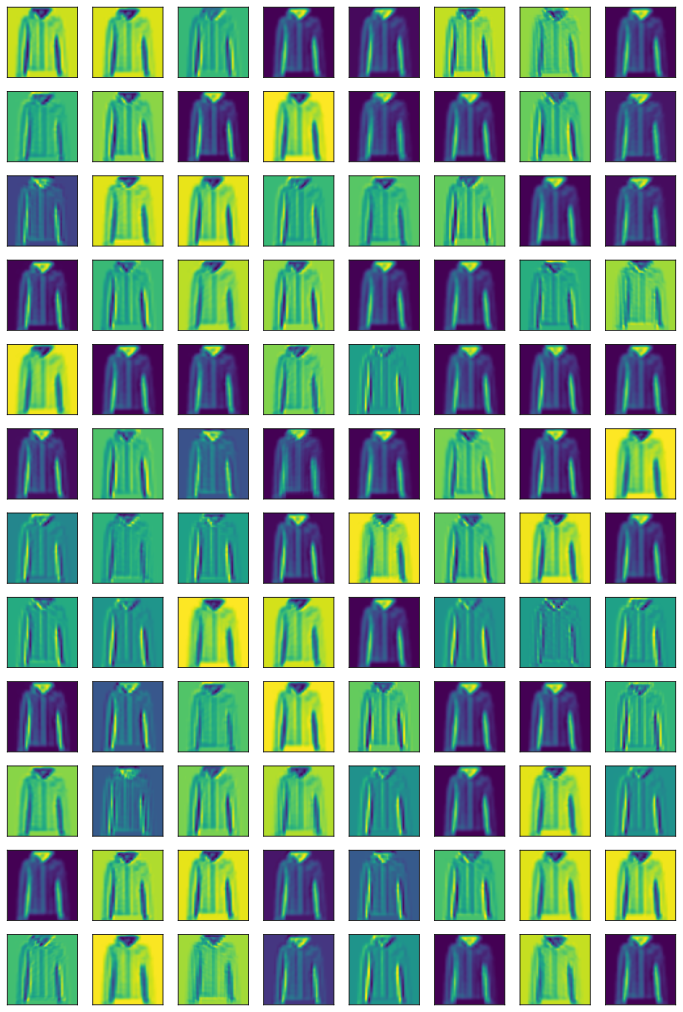

In [81]:
# LOAD PARAMS:
# Recuperar/carregar os parâmetros salvos.
clone = AlexNet()                                    # instanciamos um clone do modelo MLP original. É possível usar clone ou model.
clone.load_state_dict(torch.load('AlexNet.params'))  # lemos os parâmetros armazenados no arquivo diretamente.
clone.eval()
 #  EXTENSÃO PARA PARÂMETROS: .params
# -----------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------
# Pega acc e y_hat:
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')                                       # transfere os dados da cpu para a gpu.
y = y.to('cuda')                                       # transfere os dados da cpu para a gpu.
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')
# -----------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------
# APLICA O MODELO COM UMA IMAGEM DE data.val.data
# Pega a sétima linha de data.val.data
# Converte para torch.float32
# unsqueeze insere a dimensão unitária em local específico (posição 1).
pic = data.val.data[6,:].type(torch.float32).unsqueeze(dim=0)
img = pic.squeeze().cpu()                                         # squeeze retira a dimensão unitária do tensor
plt.imshow(img)
# d2l.show_images(img, num_rows=1, num_cols=1)   # Serve apenas para plotar uma lista de imagens.

pic = v2.Resize(size=(224, 224))(pic)                             # resize de 28x28 para 224x224
pic.shape
img = pic.squeeze().cpu()                                         # squeeze retira a dimensão unitária do tensor
plt.imshow(img)
# -----------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------
# Convoluções da Primeira camada
saida = model.net[0](pic.cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
d2l.show_images(saida.cpu().reshape(96,54,54),12,8)   # 2 imagens de 16@10x10
saida.shape   # Shape de Saída.
# -----------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------
# APLICA A IMAGEM ESCOLHIDA NA REDE COMPLETA
saida = model.net(pic.unsqueeze(dim=0).cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
# -------------------------------------------------
# CLASSIFICA A IMAGEM CONFORME A SAÍDA.
m = saida.max()                                        # saída máxima
idx_tensor = (saida==m).nonzero(as_tuple=True)[1]      # índice do tensor
indice = int(idx_tensor)                               # converte tensor para inteiro

list_chaves = []                                       # cria lista vazia
classificadores = data.val.class_to_idx                # dicionário de classificação do FashionMNIST
chaves = classificadores.keys()                        # Chaves do dicionário
for chave in chaves:
    list_chaves.append(chave)                          # Coloca as chaves em uma lista
classificacao = list_chaves[indice]                    # Busca o indice na lista
classificacao
# -----------------------------------------------------------------------------------------------------

# Utilizando clone no lugar de model para verificar a saída

Utilizando o clone não é preciso treinar a rede toda vez. Basta carregar os parâmetros treinados salvos.

In [83]:
# saida = clone.net(pic.unsqueeze(dim=0).cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
saida = clone.net(pic.unsqueeze(dim=0))             # Retira o cuda, pois o clone roda na cpu.
saida

tensor([[  687.2495,   597.6549,  1335.4250,   500.4967,  1988.8966, -1040.2897,
          1710.7004, -2288.1179, -1104.5352, -2037.4473]],
       grad_fn=<AddmmBackward0>)

In [84]:
m = saida.max()                                        # saída máxima
idx_tensor = (saida==m).nonzero(as_tuple=True)[1]      # índice do tensor
indice = int(idx_tensor)                               # converte tensor para inteiro

list_chaves = []                                       # cria lista vazia
classificadores = data.val.class_to_idx                # dicionário de classificação do FashionMNIST
chaves = classificadores.keys()                        # Chaves do dicionário
for chave in chaves:
    list_chaves.append(chave)                          # Coloca as chaves em uma lista
classificacao = list_chaves[indice]                    # Busca o indice na lista
classificacao

'Coat'

----------------------------------------------------------------------

# Utilizando imagem própria

- Meu chinelo

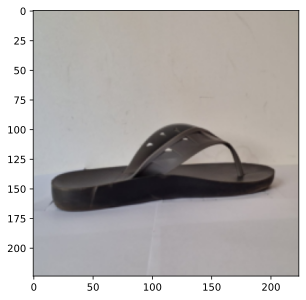

(224, 224)
tensor([[[0.6902, 0.6941, 0.6980,  ..., 0.6784, 0.6784, 0.6667],
         [0.6902, 0.6863, 0.6941,  ..., 0.6784, 0.6784, 0.6588],
         [0.6941, 0.6863, 0.6863,  ..., 0.6824, 0.6824, 0.6588],
         ...,
         [0.6627, 0.6667, 0.6667,  ..., 0.6667, 0.6706, 0.6627],
         [0.6667, 0.6667, 0.6667,  ..., 0.6667, 0.6667, 0.6588],
         [0.6706, 0.6706, 0.6706,  ..., 0.6588, 0.6627, 0.6588]],

        [[0.6980, 0.7020, 0.7020,  ..., 0.6471, 0.6471, 0.6392],
         [0.6980, 0.6941, 0.7020,  ..., 0.6471, 0.6471, 0.6314],
         [0.7020, 0.6941, 0.6941,  ..., 0.6510, 0.6510, 0.6314],
         ...,
         [0.6745, 0.6784, 0.6784,  ..., 0.6471, 0.6510, 0.6431],
         [0.6784, 0.6784, 0.6784,  ..., 0.6471, 0.6471, 0.6392],
         [0.6745, 0.6745, 0.6745,  ..., 0.6471, 0.6431, 0.6353]],

        [[0.6784, 0.6824, 0.6824,  ..., 0.6039, 0.6039, 0.5922],
         [0.6784, 0.6745, 0.6784,  ..., 0.6039, 0.6039, 0.5843],
         [0.6824, 0.6745, 0.6706,  ..., 0.6078,

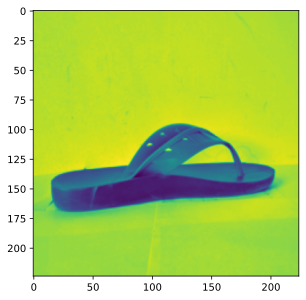

torch.Size([1, 224, 224])

In [66]:
import numpy as np
from PIL import Image
from torchvision import transforms
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.transforms import v2

import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------------
original_image = Image.open(Path('G:\\Meu Drive\\0-DOUTORADO\\0-Python\\PycharmProjects\\data\\FashionMNIST')
                            / 'meu_chinelo.jpeg')

resized_imgs = v2.Resize(size=(224,224))(original_image)    # fornecendo apenas um valor para o size a dimensão é mantida.
plt.figure()
plt.imshow(resized_imgs)
plt.show()
print(resized_imgs.size)

trans = transforms.Compose([transforms.ToTensor()])
tensor_imag = trans(resized_imgs)
print(tensor_imag)
print(tensor_imag.shape)

plt.imshow(tensor_imag[0])
plt.show()

pic = tensor_imag[0].unsqueeze(dim=0)
pic.shape


In [67]:
# -----------------------------------------------------------------------------------------------------
# APLICA A IMAGEM ESCOLHIDA NA REDE COMPLETA
saida = model.net(pic.unsqueeze(dim=0).cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
saida

tensor([[ 4.5737, -2.2096,  2.1856, -1.2827, -2.3988, -2.4122,  4.8461, -2.3497,
          3.8014, -4.1113]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [68]:
# -------------------------------------------------
# CLASSIFICA A IMAGEM CONFORME A SAÍDA.
m = saida.max()                                        # saída máxima
idx_tensor = (saida==m).nonzero(as_tuple=True)[1]      # índice do tensor
indice = int(idx_tensor)                               # converte tensor para inteiro

list_chaves = []                                       # cria lista vazia
classificadores = data.val.class_to_idx                # dicionário de classificação do FashionMNIST
chaves = classificadores.keys()                        # Chaves do dicionário
for chave in chaves:
    list_chaves.append(chave)                          # Coloca as chaves em uma lista
classificacao = list_chaves[indice]                    # Busca o indice na lista
classificacao
# -----------------------------------------------------------------------------------------------------

'Shirt'

Não conseguiu identificar

--------------------------------

- Minha bota

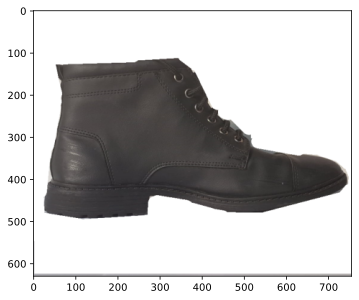

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.9412, 0.9412, 0.9412,  ..., 0.9373, 0.9373, 0.7961],
         [0.7216, 0.7216, 0.7176,  ..., 0.7020, 0.7020, 0.6902],
         [0.6941, 0.6941, 0.6980,  ..., 0.6824, 0.6824, 0.6824]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.9373, 0.9373, 0.9373,  ..., 0.9373, 0.9373, 0.7961],
         [0.7059, 0.7059, 0.7020,  ..., 0.7020, 0.7020, 0.6863],
         [0.6784, 0.6784, 0.6824,  ..., 0.6784, 0.6784, 0.6784]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

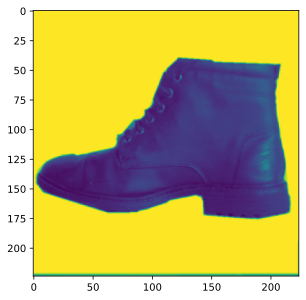

torch.Size([1, 224, 224])

In [125]:
import numpy as np
from PIL import Image
from torchvision import transforms
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.transforms import v2

import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------------
original_image = Image.open(Path('G:\\Meu Drive\\0-DOUTORADO\\0-Python\\PycharmProjects\\data\\FashionMNIST')
                            / 'minha_bota2.png')
plt.imshow(original_image)
plt.show()

trans = transforms.Compose([v2.Resize(size=(224,224)),        # resize para 224x224
                            v2.RandomHorizontalFlip(p=1),   # inverte a imagem 
                            # v2.RandomResizedCrop(size=(50, 50), antialias=True),                        # corta a imagem
                            # v2.ToDtype(torch.float32, scale=True),                                        # muda o tipo 
                            # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                            transforms.ToTensor()])           # converte para tensor
tensor_imag = trans(original_image)                            # resize, inverte e converte para tensor
print(tensor_imag)
print(tensor_imag.shape)



plt.imshow(tensor_imag[0])
plt.show()

pic = tensor_imag[0].unsqueeze(dim=0)
pic.shape


In [126]:
# -----------------------------------------------------------------------------------------------------
# APLICA A IMAGEM ESCOLHIDA NA REDE COMPLETA
saida = model.net(pic.unsqueeze(dim=0).cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
saida

tensor([[10.9341, -6.0504,  6.0436, -0.9123, -2.7066, -4.0466,  8.0149, -6.7404,
          6.3438, -9.4708]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [127]:
# -------------------------------------------------
# CLASSIFICA A IMAGEM CONFORME A SAÍDA.
m = saida.max()                                        # saída máxima
idx_tensor = (saida==m).nonzero(as_tuple=True)[1]      # índice do tensor
indice = int(idx_tensor)                               # converte tensor para inteiro

list_chaves = []                                       # cria lista vazia
classificadores = data.val.class_to_idx                # dicionário de classificação do FashionMNIST
chaves = classificadores.keys()                        # Chaves do dicionário
for chave in chaves:
    list_chaves.append(chave)                          # Coloca as chaves em uma lista
classificacao = list_chaves[indice]                    # Busca o indice na lista
classificacao
# -----------------------------------------------------------------------------------------------------

'T-shirt/top'

Não conseguiu identificar

------------------------------

# 8.1.4. Discussão
A estrutura do AlexNet tem uma semelhança impressionante com o LeNet, com uma série de melhorias críticas, tanto para precisão (dropout) quanto para facilidade de treinamento (ReLU). O que é igualmente impressionante é a quantidade de progresso que foi feito em termos de ferramentas de aprendizado profundo. O que era vários meses de trabalho em 2012 agora pode ser realizado em uma dúzia de linhas de código usando qualquer framework moderno.

Ao rever a arquitetura, vemos que o AlexNet tem um calcanhar de Aquiles no que diz respeito à eficiência: as duas últimas camadas ocultas requerem matrizes de tamanho 6400x4096 e 4096x4096, respectivamente. Isso corresponde a 164 MB de memória e 81 MFLOPs de computação, ambos os quais são um desembolso não trivial, especialmente em dispositivos menores, como celulares. Esta é uma das razões pelas quais o AlexNet foi superado por arquiteturas muito mais eficazes que abordaremos nas seções a seguir. No entanto, é um passo fundamental de redes rasas para profundas que são usadas hoje em dia. 

Observe que, embora o número de parâmetros exceda em muito a quantidade de dados de treinamento em nossos experimentos (as duas últimas camadas têm mais de 40 milhões de parâmetros, treinados em um conjunto de dados de 60 mil imagens), dificilmente há overfitting: a perda de treinamento e validação é virtualmente idêntica durante todo o treinamento. Isso se deve à regularização aprimorada, como o dropout, inerente aos designs modernos de redes profundas.

Embora pareça que há apenas algumas linhas a mais na implementação do AlexNet do que na do LeNet, a comunidade acadêmica levou muitos anos para abraçar essa mudança conceitual e aproveitar seus excelentes resultados experimentais. Isso também se deveu à falta de ferramentas computacionais eficientes. Na época, nem DistBelief ( Dean et al. , 2012 ) nem Caffe ( Jia et al. , 2014 ) existiam, e Theano ( Bergstra et al. , 2010 ) ainda carecia de muitos recursos distintivos. Foi a disponibilidade do TensorFlow ( Abadi et al. , 2016 ) que mudou drasticamente a situação.

# 8.1.5. Exercícios

# Ex. 1 - Dando continuidade à discussão acima, analise as propriedades computacionais do AlexNet.

# - Calcule a pegada de memória (Memory footprint) para convoluções e camadas totalmente conectadas, respectivamente. Qual delas domina?

__Memory footprint refers to the amount of main memory that a program uses or references while running.
In computing, the memory footprint of a software application indicates its runtime memory requirements, while the program executes.__
 
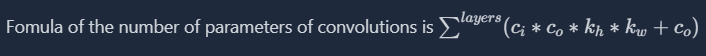

Pegada de memória para as convoluções:
3 * 96 * 11 * 11 + 96 + \
96 * 256 * 5 * 5 + 256 + \
256 * 384 * 3 * 3 + 384 + \
384 * 384 * 3 * 3 + 384 + \
384 * 256 * 3 * 3 + 256     
= 3.747.200

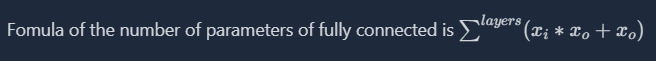

6400 * 4096 + 4096 + \
4096 * 4096 + 4096 + \
4096 * 10 + 10 
=  43.040.778  

The fully connected layers dominates

# - Calcule o custo computacional para as convoluções e as camadas totalmente conectadas.

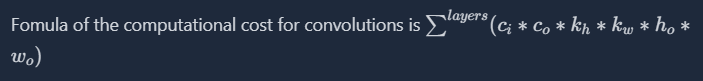

3 * 96 * 11 * 11 * 54 * 54 + \
96 * 256 * 5 * 5 * 26 * 26 +  \
256 * 384 * 3 * 3 * 12 * 12 + \
384 * 384 * 3 * 3 * 12 * 12 + \
384 * 256 * 3 * 3 * 12 * 12 = \
962.858.112

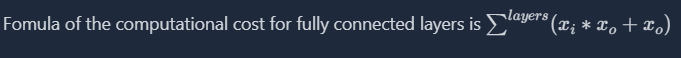

6400 * 4096 + 4096 + \
4096 * 4096 + 4096 + \
4096 * 10 + 10 \
= 43.040.778

The convolutions layers dominates

# - Como a memória (largura de banda de leitura e gravação, latência, tamanho) afeta a computação? Há alguma diferença em seus efeitos para treinamento e inferência?

Memory characteristics, including read and write bandwidth, latency, and size, have a significant impact on computation in both training and inference of neural networks. These factors can influence the overall performance, efficiency, and speed of the computation. 

In summary, memory characteristics significantly influence neural network computation. High bandwidth, low latency, sufficient memory size, and efficient memory hierarchy are all essential for achieving optimal performance in both training and inference. While there might be nuances in how these aspects affect training and inference, addressing memory-related bottlenecks is crucial for overall efficiency and speed in deep learning computations.

# Ex. 3 - Por que os engenheiros não relatam mais benchmarks de desempenho no AlexNet?

AlexNet, while pioneering, was introduced in 2012, and its architecture might not represent the state-of-the-art in terms of efficiency and accuracy compared to more recent models. Newer models, architectures, and techniques have been developed that surpass the performance of AlexNet on various tasks.

Over the years, more advanced architectures like VGG, ResNet, Inception, and Transformer-based models (BERT, GPT, etc.) have been developed and have become more popular for benchmarking and research. These architectures often achieve better accuracy and efficiency than AlexNet.

# Ex. 5 - O AlexNet pode ser muito complexo para o conjunto de dados Fashion-MNIST, principalmente devido à baixa resolução das imagens iniciais.

# - Tente simplificar o modelo para tornar o treinamento mais rápido, garantindo que a precisão não caia significativamente.

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt            # para plot
from torchvision.transforms import v2      # para resize
# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)


AlexNet().layer_summary((1, 1, 224, 224))


model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224)) # Resize de 28x28 para 224x224, para adquar a imagem a rede
trainer = d2l.Trainer(max_epochs=2, num_gpus=1)
trainer.fit(model, data)

# -----------------------------------------------------------------------------------------------------
# SALVA PARÂMETROS TREINADOS
torch.save(model.state_dict(), 'AlexNet2.params')                    # salva todos os parâmetros do modelo treinado.
 #  EXTENSÃO PARA PARÂMETROS: .params

[(name, param.shape) for name, param in model.named_parameters()]   # nomes dos parâmetros

In [ ]:
# -----------------------------------------------------------------------------------------------------
# Pega acc e y_hat:
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')                                       # transfere os dados da cpu para a gpu.
y = y.to('cuda')                                       # transfere os dados da cpu para a gpu.
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')
# -----------------------------------------------------------------------------------------------------


In [ ]:

# -----------------------------------------------------------------------------------------------------
# APLICA O MODELO COM UMA IMAGEM DE data.val.data
# Pega a sétima linha de data.val.data
# Converte para torch.float32
# unsqueeze insere a dimensão unitária em local específico (posição 1).
pic = data.val.data[6,:].type(torch.float32).unsqueeze(dim=0)
img = pic.squeeze().cpu()                                         # squeeze retira a dimensão unitária do tensor
plt.imshow(img)
# d2l.show_images(img, num_rows=1, num_cols=1)   # Serve apenas para plotar uma lista de imagens.

pic = v2.Resize(size=(224, 224))(pic)                             # resize de 28x28 para 224x224
pic.shape
img = pic.squeeze().cpu()                                         # squeeze retira a dimensão unitária do tensor
plt.imshow(img)
# -----------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------
# APLICA A IMAGEM ESCOLHIDA NA REDE COMPLETA
saida = model.net(pic.unsqueeze(dim=0).cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
# -------------------------------------------------
saida


In [ ]:

# CLASSIFICA A IMAGEM CONFORME A SAÍDA.
m = saida.max()                                        # saída máxima
idx_tensor = (saida==m).nonzero(as_tuple=True)[1]      # índice do tensor
indice = int(idx_tensor)                               # converte tensor para inteiro

list_chaves = []                                       # cria lista vazia
classificadores = data.val.class_to_idx                # dicionário de classificação do FashionMNIST
chaves = classificadores.keys()                        # Chaves do dicionário
for chave in chaves:
    list_chaves.append(chave)                          # Coloca as chaves em uma lista
classificacao = list_chaves[indice]                    # Busca o indice na lista
classificacao
# -----------------------------------------------------------------------------------------------------

# - Projetar um modelo melhor que funcione diretamente em imagens 28x28.

[('net.0.weight', torch.Size([6, 1, 3, 3])),
 ('net.0.bias', torch.Size([6])),
 ('net.3.weight', torch.Size([16, 6, 3, 3])),
 ('net.3.bias', torch.Size([16])),
 ('net.7.weight', torch.Size([256, 256])),
 ('net.7.bias', torch.Size([256])),
 ('net.10.weight', torch.Size([128, 256])),
 ('net.10.bias', torch.Size([128])),
 ('net.13.weight', torch.Size([10, 128])),
 ('net.13.bias', torch.Size([10]))]

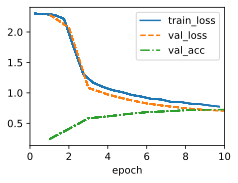

In [161]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt            # para plot
from torchvision.transforms import v2      # para resize
# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

class AlexNet2(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=3, padding=1),                 # camada convolucional 1
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),          
            nn.LazyConv2d(16, kernel_size=3, padding=1), nn.ReLU(),     # camada convolucional 2
            nn.MaxPool2d(kernel_size=3),
            # nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            # nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            # nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            # nn.MaxPool2d(kernel_size=3, stride=2), 
            nn.Flatten(),
            nn.LazyLinear(256), nn.ReLU(), nn.Dropout(p=0.5),           # camada totalmente conectada 1
            nn.LazyLinear(128), nn.ReLU(),nn.Dropout(p=0.5),            # camada totalmente conectada 2
            nn.LazyLinear(num_classes)                                  # camada de saída. Total = 5 camadas  
        )
        self.net.apply(d2l.init_cnn)


# AlexNet().layer_summary((1, 1, 224, 224))
AlexNet2().layer_summary((1, 1, 28, 28))

model = AlexNet2(lr=0.01)
data = d2l.FashionMNIST(batch_size=128)          
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

# -----------------------------------------------------------------------------------------------------
# SALVA PARÂMETROS TREINADOS
torch.save(model.state_dict(), 'AlexNet_28x28.params')                    # salva todos os parâmetros do modelo treinado.
 #  EXTENSÃO PARA PARÂMETROS: .params

[(name, param.shape) for name, param in model.named_parameters()]   # nomes dos parâmetros

In [162]:
# -----------------------------------------------------------------------------------------------------
# Pega acc e y_hat:
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')                                       # transfere os dados da cpu para a gpu.
y = y.to('cuda')                                       # transfere os dados da cpu para a gpu.
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')
# -----------------------------------------------------------------------------------------------------


acc: 0.73


tensor([[ -627.1232, -1146.8345, -1393.2551,  -281.4621,  -946.8449,  1272.6163,
         -1070.9044,  1839.7018,   436.7447,  2287.4578]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

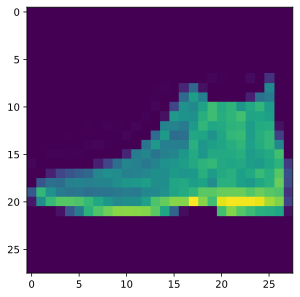

In [152]:

# -----------------------------------------------------------------------------------------------------
# APLICA O MODELO COM UMA IMAGEM DE data.val.data
# Pega a sétima linha de data.val.data
# Converte para torch.float32
# unsqueeze insere a dimensão unitária em local específico (posição 1).
pic = data.val.data[0,:].type(torch.float32).unsqueeze(dim=0)
img = pic.squeeze().cpu()                                         # squeeze retira a dimensão unitária do tensor
plt.imshow(img)
# d2l.show_images(img, num_rows=1, num_cols=1)   # Serve apenas para plotar uma lista de imagens.

# pic = v2.Resize(size=(224, 224))(pic)                             # resize de 28x28 para 224x224
# pic.shape
img = pic.squeeze().cpu()                                         # squeeze retira a dimensão unitária do tensor
plt.imshow(img)
# -----------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------
# APLICA A IMAGEM ESCOLHIDA NA REDE COMPLETA
saida = model.net(pic.unsqueeze(dim=0).cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
# -------------------------------------------------
saida


In [153]:

# CLASSIFICA A IMAGEM CONFORME A SAÍDA.
m = saida.max()                                        # saída máxima
idx_tensor = (saida==m).nonzero(as_tuple=True)[1]      # índice do tensor
indice = int(idx_tensor)                               # converte tensor para inteiro

list_chaves = []                                       # cria lista vazia
classificadores = data.val.class_to_idx                # dicionário de classificação do FashionMNIST
chaves = classificadores.keys()                        # Chaves do dicionário
for chave in chaves:
    list_chaves.append(chave)                          # Coloca as chaves em uma lista
classificacao = list_chaves[indice]                    # Busca o indice na lista
classificacao
# -----------------------------------------------------------------------------------------------------

'Ankle boot'

# Ex. 7 - Aplique dropout e ReLU ao LeNet-5. Isso melhora? Você pode melhorar as coisas ainda mais por meio do pré-processamento para aproveitar as invariâncias inerentes às imagens?

tensor([[ -478.7550,  -356.2517, -1153.2449,  ...,  1114.4849,    93.9487,
          1978.2299],
        [  362.4680,  -865.5768,  2269.2700,  ..., -1488.1023,  -311.1724,
          -964.5908],
        [ -688.7449,  5257.3857, -2585.0417,  ...,  -700.9062,  -739.1909,
          -722.8780],
        ...,
        [  175.7304,   -61.5323,  -230.8206,  ...,   -83.3977,  1314.2981,
          -294.1230],
        [ -691.6445,  5179.0630, -2559.6897,  ...,  -818.2650,  -700.6468,
          -700.2962],
        [ -258.5900,  -138.3441,  -362.5973,  ...,   239.5588,   -95.1959,
            95.9775]], device='cuda:0', grad_fn=<AddmmBackward0>)
acc: 0.82


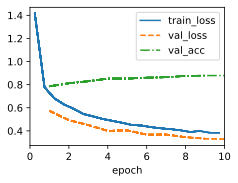

In [163]:
import torch
from torch import nn
from d2l import torch as d2l

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:       # caso o módulo seja linear ou convolucional, realiza a inicialização Xavier.
        nn.init.xavier_uniform_(module.weight)                       # inicialização Xavier.

# ------------------------------------------------------------------------------------

class LeNet(d2l.Classifier):                      # Cria a arquitetura da rede
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):   # lr = learning rate
        super().__init__()                        # busca o .init() de d2l.Classifier.
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(out_channels=6, kernel_size=5, padding=2), nn.ReLU(), # Convolução + Sigmoid (Função de ativação --> aplica não linearidade)
            nn.MaxPool2d(kernel_size=2, stride=2), # Pooling=agrupamento Avg(médio). Max pooling não existia.                        
            nn.LazyConv2d(out_channels=16, kernel_size=5), nn.ReLU(), # Convolução + Sigmoid (Função de ativação --> aplica não linearidade)
            nn.MaxPool2d(kernel_size=2, stride=2), # Pooling=agrupamento Avg(médio). Max pooling não existia. 
            nn.Flatten(), # Achatamento: 1x400: 16x(5x5)
            nn.LazyLinear(120), nn.ReLU(), nn.Dropout(0.5),# 1x120 + Função de ativação
            nn.LazyLinear(84), nn.ReLU(),  nn.Dropout(0.5),# 1x84  + Função de ativação
            nn.LazyLinear(num_classes))       # num_classes = 10
# Sigmoid é um caso especial de softmax.
# ------------------------------------------------------------------------------------

@d2l.add_to_class(d2l.Classifier)  #@save
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)                                                 # aplica a entrada X por cada camada em self.net = model.net
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()                                                      # cria o modelo
a = model.layer_summary((1, 1, 28, 28))                                  # verifica a arquitetura do modelo para o shape indicado (que será o shape de X)

# ------------------------------------------------------------------------------------

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)                           # treinador
data = d2l.FashionMNIST(batch_size=128)                                    # dados
model = LeNet(lr=0.1)                                                      # modelo
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)     # aplica a função init_cnn, que realiza a inicialização Xavier
trainer.fit(model, data)                                                   # início do treinamento

# ------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------
# PEGAR y_hat e imprimir acc:
# ------------------------------------------------------------------------------------
# SOLUÇÃO 1: treinamento sem GPU: # trainer = d2l.Trainer(max_epochs=10)
# y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
# print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')
# ------------------------------------------------------------------------------------
# SOLUÇÃO 2: treinar com gpu e transferir o dataset para a GPU.

# Verifica qual dispositivo está disponível: CPU ou GPU (cuda)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()              # dispositivo utilizado

# Transfere 'data' para 'device'
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

val2 = to_device(data.val.data, device)                     # transfere os dados de validação (data.val.data) da cpu para a gpu
y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
print(y_hat)

targets2 = to_device(data.val.targets, device)                     # transfere os dados de targets (data.val.targets) da cpu para a gpu
print(f'acc: {model.accuracy(y_hat,targets2).item():.2f}')
# ------------------------------------------------------------------------------------



---------------------------

tensor([[ -209.9044,  -176.3627,  -230.9074,  ...,   397.8730,    -8.8417,
           714.0108],
        [   49.0323,  -129.3597,   467.0669,  ...,  -345.8652,   -14.5301,
          -269.5906],
        [  227.3562,  3012.8452,  -684.2651,  ..., -1697.4474,  -684.2681,
          -954.2505],
        ...,
        [   46.3250,  -204.7002,  -144.1576,  ...,  -122.7875,   678.3730,
          -229.5803],
        [  215.7407,  2571.1858,  -572.9696,  ..., -1466.5562,  -579.7869,
          -858.0637],
        [  -27.4461,   -28.7972,   -44.1437,  ...,    65.2923,    71.8329,
            37.4108]], device='cuda:0', grad_fn=<AddmmBackward0>)
acc: 0.81


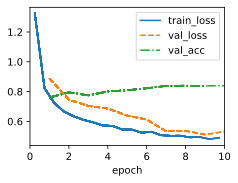

In [164]:
import torch
from torch import nn
from d2l import torch as d2l

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:       # caso o módulo seja linear ou convolucional, realiza a inicialização Xavier.
        nn.init.xavier_uniform_(module.weight)                       # inicialização Xavier.

# ------------------------------------------------------------------------------------

class LeNet(d2l.Classifier):                      # Cria a arquitetura da rede
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):   # lr = learning rate
        super().__init__()                        # busca o .init() de d2l.Classifier.
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(out_channels=6, kernel_size=5, padding=2), nn.ReLU(), nn.Dropout(0.5), # Convolução + Sigmoid (Função de ativação --> aplica não linearidade)
            nn.MaxPool2d(kernel_size=2, stride=2), # Pooling=agrupamento Avg(médio). Max pooling não existia.                        
            nn.LazyConv2d(out_channels=16, kernel_size=5), nn.ReLU(), nn.Dropout(0.5), # Convolução + Sigmoid (Função de ativação --> aplica não linearidade)
            nn.MaxPool2d(kernel_size=2, stride=2), # Pooling=agrupamento Avg(médio). Max pooling não existia. 
            nn.Flatten(), # Achatamento: 1x400: 16x(5x5)
            nn.LazyLinear(120), nn.ReLU(), nn.Dropout(0.5),# 1x120 + Função de ativação
            nn.LazyLinear(84), nn.ReLU(),  nn.Dropout(0.5),# 1x84  + Função de ativação
            nn.LazyLinear(num_classes))       # num_classes = 10
# Sigmoid é um caso especial de softmax.
# ------------------------------------------------------------------------------------

@d2l.add_to_class(d2l.Classifier)  #@save
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)                                                 # aplica a entrada X por cada camada em self.net = model.net
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()                                                      # cria o modelo
a = model.layer_summary((1, 1, 28, 28))                                  # verifica a arquitetura do modelo para o shape indicado (que será o shape de X)

# ------------------------------------------------------------------------------------

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)                           # treinador
data = d2l.FashionMNIST(batch_size=128)                                    # dados
model = LeNet(lr=0.1)                                                      # modelo
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)     # aplica a função init_cnn, que realiza a inicialização Xavier
trainer.fit(model, data)                                                   # início do treinamento

# ------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------
# PEGAR y_hat e imprimir acc:
# ------------------------------------------------------------------------------------
# SOLUÇÃO 1: treinamento sem GPU: # trainer = d2l.Trainer(max_epochs=10)
# y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
# print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')
# ------------------------------------------------------------------------------------
# SOLUÇÃO 2: treinar com gpu e transferir o dataset para a GPU.

# Verifica qual dispositivo está disponível: CPU ou GPU (cuda)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()              # dispositivo utilizado

# Transfere 'data' para 'device'
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

val2 = to_device(data.val.data, device)                     # transfere os dados de validação (data.val.data) da cpu para a gpu
y_hat = model(val2.type(torch.float32).unsqueeze(dim=1))
print(y_hat)

targets2 = to_device(data.val.targets, device)                     # transfere os dados de targets (data.val.targets) da cpu para a gpu
print(f'acc: {model.accuracy(y_hat,targets2).item():.2f}')
# ------------------------------------------------------------------------------------



--------------------------

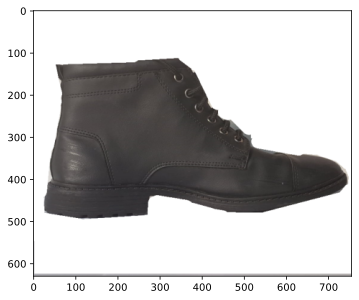

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9843],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9843],
         [0.9412, 0.9412, 0.9412,  ..., 0.9373, 0.9373, 0.9255]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9843],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9843],
         [0.9373, 0.9373, 0.9412,  ..., 0.9373, 0.9373, 0.9255]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

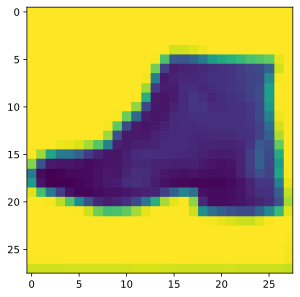

torch.Size([1, 28, 28])

In [165]:
import numpy as np
from PIL import Image
from torchvision import transforms
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.transforms import v2

import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------------
original_image = Image.open(Path('G:\\Meu Drive\\0-DOUTORADO\\0-Python\\PycharmProjects\\data\\FashionMNIST')
                            / 'minha_bota2.png')
plt.imshow(original_image)
plt.show()

trans = transforms.Compose([v2.Resize(size=(28,28)),        # resize para 224x224
                            v2.RandomHorizontalFlip(p=1),   # inverte a imagem 
                            # v2.RandomResizedCrop(size=(50, 50), antialias=True),                        # corta a imagem
                            # v2.ToDtype(torch.float32, scale=True),                                        # muda o tipo 
                            # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                            transforms.ToTensor()])           # converte para tensor

# v2.RandomHorizontalFlip()   # inverte a imagem horizontalmente
# v2.RandomVerticalFlip()     # inverte a imagem verticalmente
# v2.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))  # corta a imagem
# v2.ColorJitter(brightness=0.5, contrast=0, saturation=0, hue=0)   # altera o brilho, contrast, saturação e/ou matiz(hue)



tensor_imag = trans(original_image)                            # resize, inverte e converte para tensor
print(tensor_imag)
print(tensor_imag.shape)



plt.imshow(tensor_imag[0])
plt.show()

pic = tensor_imag[0].unsqueeze(dim=0)
pic.shape


In [166]:
# Doze primeiras camadas = todas as camadas do LeNet
# saida = model.net[:12](pic.unsqueeze(dim=0).cuda())    # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
saida = model.net(pic.unsqueeze(dim=0).cuda())           # BASTA COLOCAR ENTRE PARÊNTESES A IMAGEM QUE DESEJA AVALIAR.
saida.shape   # Shape de Saída.

# ------------------------------------------------------------------------------------
# CLASSIFICA A IMAGEM CONFORME A SAÍDA.
m = saida.max()                                        # saída máxima
idx_tensor = (saida==m).nonzero(as_tuple=True)[1]      # índice do tensor
indice = int(idx_tensor)                               # converte tensor para inteiro

list_chaves = []                                       # cria lista vazia
classificadores = data.val.class_to_idx                # dicionário de classificação do FashionMNIST
chaves = classificadores.keys()                        # Chaves do dicionário
for chave in chaves:
    list_chaves.append(chave)                          # Coloca as chaves em uma lista
classificacao = list_chaves[indice]                    # Busca o indice na lista
# ------------------------------------------------------------------------------------


In [168]:
saida

tensor([[ 1.0387, -1.3851,  0.5979, -0.0977,  0.1030, -1.0824,  1.2281, -1.3484,
          2.6051, -1.4333]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [167]:
classificacao

'Bag'

# Outras respostas:

https://pandalab.me/archives/AlexNet

# Referências:

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/2201.03545

https://pytorch.org/vision/stable/models.html

Revisão aprofundada de etapas de pré-processamento: \
Buslaev et al., 2020

Buslaev, A., Iglovikov, V. I., Khvedchenya, E., Parinov, A., Druzhinin, M., & Kalinin, A. A. (2020). Albumentations: Fast and flexible image augmentations. Information, 11(2), 125.

COMO CALCULAR O SHAPE NA CONVOLUÇÃO: \
https://arnabfly.github.io/arnab_blog/lenet1/

https://arnabfly.github.io/arnab_blog/alexnet/

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.usenix.org/system/files/conference/osdi16/osdi16-abadi.pdf



--------------